In [1]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

from utils import PlotParams
plotter = PlotParams()
plotter.set_params()

In [2]:
RES_DIR = os.path.join(os.pardir, 'results_new')
SAVE_DIR = os.path.join(os.pardir, 'figs_new')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

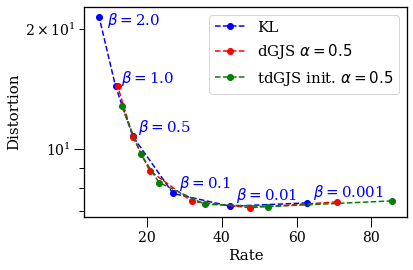

In [3]:
rates = []
distortions = []
b_range = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]#, 5.0]#, 10, 50]
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_kl_b-{b}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    rates.append(train_losses.loc[train_losses['Loss'] == 'kl_loss']['Value'].iloc[-1])
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])
plt.semilogy(rates, distortions, 'bo--', label='KL')
for i, b in enumerate(b_range):
    if i == len(b_range)-1:
        plt.text(rates[i]+2, distortions[i]-1, r'$\beta=$'+str(b), color='b', ha='left')
    else:
        plt.text(rates[i]+1.5, distortions[i]+0.25, r'$\beta=$'+str(b), color='b', ha='left')

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_dgjs_b-{b}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    rates.append(train_losses.loc[train_losses['Loss'] == 'kl_lossrkl']['Value'].iloc[-1])
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])
plt.semilogy(rates, distortions, 'ro--', label=r'dGJS $\alpha=0.5$')
# for i, b in enumerate(b_range):
#     plt.text(rates[i], distortions[i], b)

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_tdgjs_b-{b}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    rates.append(train_losses.loc[train_losses['Loss'] == 'kl_lossrkl']['Value'].iloc[-1])
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])
plt.semilogy(rates, distortions, 'go--', label=r'tdGJS init. $\alpha=0.5$')
# for i, b in enumerate(b_range):
#     plt.text(rates[i], distortions[i], b)

plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'rd_train.pdf'))
plt.show()

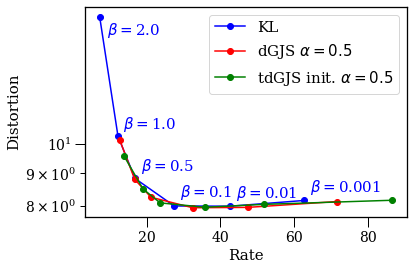

In [4]:
rates = []
distortions = []
b_range = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]#, 5.0]#, 10, 50]
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_kl_b-{b}')
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    rates.append(test_losses['kl_loss'])
    distortions.append(test_losses['recon_loss'])
plt.semilogy(rates, distortions, 'bo-', label='KL')
for i, b in enumerate(b_range):
    if i == len(b_range)-1:
        plt.text(rates[i]+2, distortions[i]-1, r'$\beta=$'+str(b), color='b', ha='left')
    else:
        plt.text(rates[i]+1.5, distortions[i]+0.25, r'$\beta=$'+str(b), color='b', ha='left')

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_dgjs_b-{b}')
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    rates.append(test_losses['kl_lossrkl'])
    distortions.append(test_losses['recon_loss'])
plt.semilogy(rates, distortions, 'ro-', label=r'dGJS $\alpha=0.5$')

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_tdgjs_b-{b}')
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    rates.append(test_losses['kl_lossrkl'])
    distortions.append(test_losses['recon_loss'])
plt.semilogy(rates, distortions, 'go-', label=r'tdGJS init. $\alpha=0.5$')

plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'rd_test.pdf'))
plt.show()

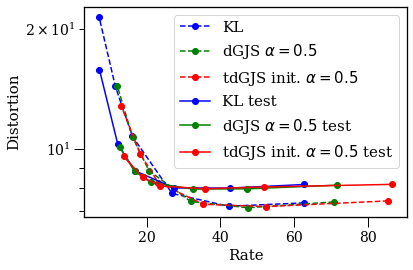

In [5]:
rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_kl_b-{b}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    rates.append(train_losses.loc[train_losses['Loss'] == 'kl_loss']['Value'].iloc[-1])
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])

plt.semilogy(rates, distortions, 'bo--', label='KL')

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_dgjs_b-{b}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    rates.append(train_losses.loc[train_losses['Loss'] == 'kl_lossrkl']['Value'].iloc[-1])
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])

plt.semilogy(rates, distortions,'go--', label=r'dGJS $\alpha=0.5$')

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_tdgjs_b-{b}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    rates.append(train_losses.loc[train_losses['Loss'] == 'kl_lossrkl']['Value'].iloc[-1])
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])

plt.semilogy(rates, distortions, 'ro--', label=r'tdGJS init. $\alpha=0.5$')

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_kl_b-{b}')
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    rates.append(test_losses['kl_loss'])
    distortions.append(test_losses['recon_loss'])

plt.semilogy(rates, distortions, 'bo-', label='KL test')

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_dgjs_b-{b}')
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    rates.append(test_losses['kl_lossrkl'])
    distortions.append(test_losses['recon_loss'])

plt.semilogy(rates, distortions, 'go-', label=r'dGJS $\alpha=0.5$ test')

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_tdgjs_b-{b}')
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    rates.append(test_losses['kl_lossrkl'])
    distortions.append(test_losses['recon_loss'])

plt.semilogy(rates, distortions, 'ro-', label=r'tdGJS init. $\alpha=0.5$ test')

plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'rd_train_test.pdf'))
plt.show()

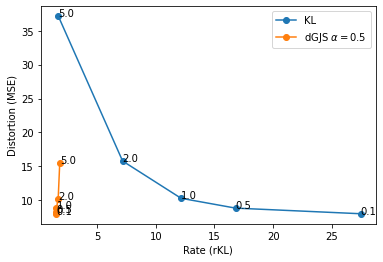

In [4]:
rates = []
distortions = []
b_range = [0.1, 0.5, 1.0, 2.0, 5.0]
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_kl_b-{b}')
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    rates.append(test_losses['kl_loss'])
    distortions.append(test_losses['recon_loss'])

plt.plot(rates, distortions, marker='o', label='KL')
for i, b in enumerate(b_range):
    plt.text(rates[i], distortions[i], b)

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_dgjs_b-{b}')
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    rates.append(test_losses['kl_loss1'])
    distortions.append(test_losses['recon_loss'])

plt.plot(rates, distortions, marker='o', label=r'dGJS $\alpha=0.5$')
for i, b in enumerate(b_range):
    plt.text(rates[i], distortions[i], b)

plt.xlabel('Rate (rKL)')
plt.ylabel('Distortion (MSE)')
plt.legend()
plt.show()

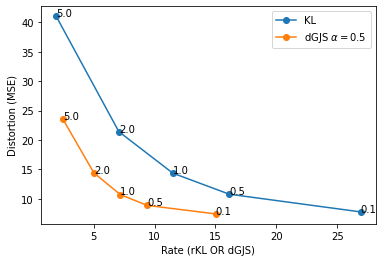

In [5]:
rates = []
distortions = []
b_range = [0.1, 0.5, 1.0, 2.0, 5.0]
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_kl_b-{b}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    rates.append(train_losses.loc[train_losses['Loss'] == 'kl_loss']['Value'].iloc[-1])
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])

plt.plot(rates, distortions, marker='o', label='KL')
for i, b in enumerate(b_range):
    plt.text(rates[i], distortions[i], b)

rates = []
distortions = []
for b in b_range:
    sub_dir = os.path.join(RES_DIR, f'mnist_dgjs_b-{b}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    rates.append(train_losses.loc[train_losses['Loss'] == 'gjs_loss_dual_invert']['Value'].iloc[-1])
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])

plt.plot(rates, distortions, marker='o', label=r'dGJS $\alpha=0.5$')
for i, b in enumerate(b_range):
    plt.text(rates[i], distortions[i], b)

plt.xlabel('Rate (rKL OR dGJS)')
plt.ylabel('Distortion (MSE)')
plt.legend()
plt.show()